># 지금까지 살펴본 이미지 식별의 문제점

- 과거의 이미지 식별에서는 이미지를 이미지로 다루지 않는다는 문제가 있음
- 단순히 화소 하나하나로 나열된 것을 식별하는 것이 아닌, 각각의 화소가 가로세로 방향으로 연결되어 어떤 형태를 만드는 과정을 고려할 필요가 있음
- 전결합층 신경망에서는 이를 전혀 고려하지 않음

___
># MNIST 데이터 세트 읽어들이기

- MNIST 데이터 세트는 TensorFlow 함수를 통해 쉽게 읽어들일 수 있음 (mnist 하위 폴더에 저장)

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist/")

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/train-labels-idx1-ubyte.gz
Extracting ./mnist/t10k-images-idx3-ubyte.gz
Extracting ./mnist/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


- 훈련전용 데이터는 `mnist.train`, 테스트 전용 데이터는 `mnist.test`로 참조 가능 (28X28, 784화소, 0~1 스케일)
- `.labels`에 각각의 레이블 리스트 저장

In [3]:
mnist.train.images[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [5]:
mnist.train.labels

array([7, 3, 4, ..., 5, 6, 8], dtype=uint8)

Text(0.5, 1.05, 'gray-scale handwritting of 7\n')

<Figure size 432x288 with 0 Axes>

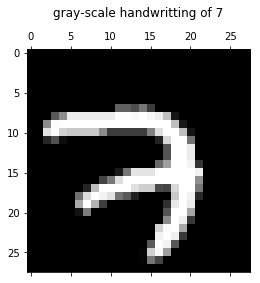

In [4]:
import matplotlib.pyplot as plt
plt.gray()
plt.matshow(mnist.train.images[0].reshape(28,28))
plt.title('gray-scale handwritting of %d\n' % mnist.train.labels[0])

___
>## 전결합층만 사용한 신경망으로 식별하기

- 간단하게 DNN Classifier를 사용해서 구현

In [6]:
import tensorflow as tf
from tensorflow.contrib.learn.python import SKCompat

- 은닉층 3개 (유닛 수 10, 20, 10개)
- 특징량 수 784개 (28*28)
- `mnist.train`으로 학습, `mnist.test`로 추론
- 정답률은 약 94% 수준

In [8]:
feature_columns = [tf.contrib.layers.real_valued_column('', dimension = 28*28)]

classifier = tf.contrib.learn.DNNClassifier(feature_columns = feature_columns,
                                           hidden_units = [10, 20, 10],
                                           n_classes = 10,
                                           model_dir = "./dnnmnist/")

classifier = SKCompat(classifier)

classifier.fit(x = mnist.train.images,
               y = mnist.train.labels.astype(np.int32),
               steps = 20000,
               batch_size = 50)

pred = classifier.predict(mnist.test.images)['classes']

classifier.score(mnist.test.images, mnist.test.labels.astype(np.int32))

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002ACC3FB99E8>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': './dnnmnist/'}
Instructions for updating:
Please use tensorflow/transform or tf.data.
Instructions for updating:
Please access pandas data directly.
Instructions for updating:
Please access pandas data directly.
Instructions for updating:
Please

INFO:tensorflow:loss = 0.3689532, step = 5001 (0.133 sec)
INFO:tensorflow:global_step/sec: 808.609
INFO:tensorflow:loss = 0.157942, step = 5101 (0.124 sec)
INFO:tensorflow:global_step/sec: 682.086
INFO:tensorflow:loss = 0.14964956, step = 5201 (0.148 sec)
INFO:tensorflow:global_step/sec: 928.408
INFO:tensorflow:loss = 0.30476886, step = 5301 (0.108 sec)
INFO:tensorflow:global_step/sec: 842.58
INFO:tensorflow:loss = 0.38256267, step = 5401 (0.120 sec)
INFO:tensorflow:global_step/sec: 686.764
INFO:tensorflow:loss = 0.5249584, step = 5501 (0.144 sec)
INFO:tensorflow:global_step/sec: 716.19
INFO:tensorflow:loss = 0.16899393, step = 5601 (0.141 sec)
INFO:tensorflow:global_step/sec: 945.924
INFO:tensorflow:loss = 0.18436128, step = 5701 (0.105 sec)
INFO:tensorflow:global_step/sec: 964.108
INFO:tensorflow:loss = 0.16845903, step = 5801 (0.105 sec)
INFO:tensorflow:global_step/sec: 828.655
INFO:tensorflow:loss = 0.18646626, step = 5901 (0.122 sec)
INFO:tensorflow:global_step/sec: 668.448
INFO:t

INFO:tensorflow:loss = 0.22638436, step = 13201 (0.129 sec)
INFO:tensorflow:global_step/sec: 879.538
INFO:tensorflow:loss = 0.08147151, step = 13301 (0.115 sec)
INFO:tensorflow:global_step/sec: 919.86
INFO:tensorflow:loss = 0.18662308, step = 13401 (0.108 sec)
INFO:tensorflow:global_step/sec: 857.002
INFO:tensorflow:loss = 0.16315174, step = 13501 (0.117 sec)
INFO:tensorflow:global_step/sec: 928.401
INFO:tensorflow:loss = 0.23438922, step = 13601 (0.108 sec)
INFO:tensorflow:global_step/sec: 856.962
INFO:tensorflow:loss = 0.10873005, step = 13701 (0.117 sec)
INFO:tensorflow:global_step/sec: 887.345
INFO:tensorflow:loss = 0.25731546, step = 13801 (0.114 sec)
INFO:tensorflow:global_step/sec: 919.888
INFO:tensorflow:loss = 0.10198964, step = 13901 (0.108 sec)
INFO:tensorflow:global_step/sec: 928.399
INFO:tensorflow:loss = 0.08246784, step = 14001 (0.108 sec)
INFO:tensorflow:global_step/sec: 911.52
INFO:tensorflow:loss = 0.28673425, step = 14101 (0.111 sec)
INFO:tensorflow:global_step/sec: 

{'loss': 0.20691264, 'accuracy': 0.9377, 'global_step': 20000}

___
>## 문제가 있는 데이터 확인

- 컨퓨전 매트릭스를 사용해서 분석 결과를 평가

In [9]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

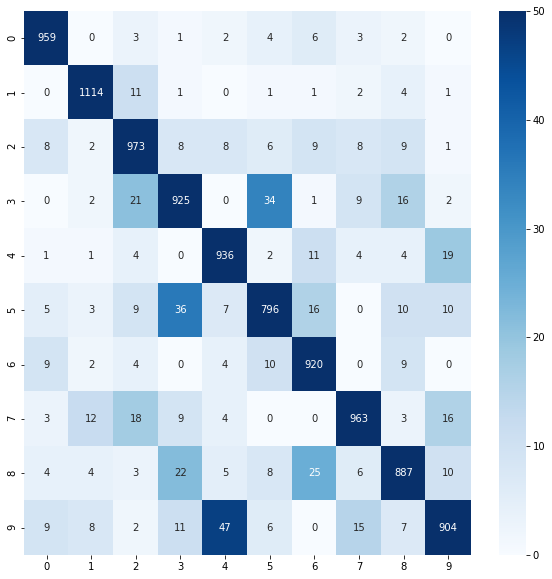

In [21]:
cm = confusion_matrix(mnist.test.labels, pred)
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot = True, fmt = 'd', vmin = 0, vmax = 50, cmap = 'Blues')

- 결과를 비교하면 3, 5, 8, 9 같이 비슷한 것에서 실수가 많이 발생
- 실수가 거의 없는 '1'을 살펴보면 다음과 같음 (`mnist.test.images[3906]`)

Text(0.5, 1.05, 'gray-scale handwritting of 1\n')

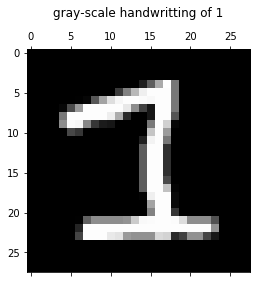

In [26]:
plt.matshow(mnist.test.images[3906].reshape(28,28))
plt.title('gray-scale handwritting of %d\n' % mnist.test.labels[3906])

In [28]:
classifier.predict(mnist.test.images[3906:3907])

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ./dnnmnist/model.ckpt-20000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


{'logits': array([[ -5.1205006 ,   0.3966062 ,   7.076335  ,   4.9415483 ,
          -6.959872  ,  -0.37042677, -14.585962  ,  -6.4113455 ,
          -4.2538676 ,  -6.265916  ]], dtype=float32),
 'probabilities': array([[4.5051906e-06, 1.1214046e-03, 8.9275348e-01, 1.0558580e-01,
         7.1595252e-07, 5.2076776e-04, 3.4907263e-10, 1.2391000e-06,
         1.0717347e-05, 1.4330642e-06]], dtype=float32),
 'classes': array([2], dtype=int64)}

- 추론 결과를 보면 '3'번째 값을 반환
- 사람은 아래 부분의 수평선을 참조하여 1이라는 것을 알 수 있음
- 하지만 fully-connected-layer를 사용하면, 이러한 개별적인 특징을 잡지 못함

Text(0.5, 1.05, 'gray-scale handwritting of 3\n')

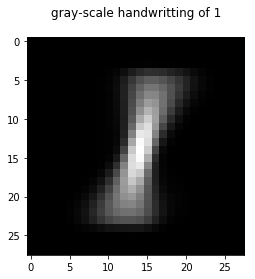

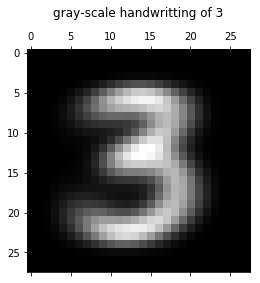

In [49]:
plt.imshow(mnist.train.images[mnist.train.labels==1].mean(axis =0).reshape(28,28))
plt.title('gray-scale handwritting of 1\n')

plt.matshow(mnist.train.images[mnist.train.labels==3].mean(axis =0).reshape(28,28))
plt.title('gray-scale handwritting of 3\n')

- 위 이미지는 `mnist.train`에 있는 1과 3의 모든 화소를 평균낸 결과임
- 위 이미지를 `mnist.test`와 비교하여 유사한 것을 찾는데, 오류를 반환한 1의 경우 아래 수평선 때문에 3과 일치하는 화소가 더 많게 됨

- 이처럼 화소 하나하나를 비교해서는 이미지 특징을 제대로 추출하기 어렵기에, 이미지 분석에서는 fully-connected-layer를 사용하는 대신 CNN을 사용